### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

Independent variable for this experiment is the task conditions: congruent or incongruent. Dependent variable is task taking time.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.


Null hypotheses H0: there is no significant difference between these two conditions which means the mean of Congruent population(muC) eaquals to the mean of Incongruent population(muI).
Alternative hypotheses Ha: the taking time for incongruent condition is significantly greater than congruent which means the mean of Congruent population(muC) is less than the mean of Incongruent population(muI).

Since this test is paired samples test, A one tail t-test will be performed due to my hypotheses(parameters: t-critial value is 1.714, df = 23 and p = 0.05). I didn't choose 2 tails t-test because the common sense of taking longer time with distraction. 
The assumptions are as followd:

1. Paired samples differences are of measurement variables.

2. Paired samples are independent.

3. The distribution of the mean difference is normal.

[1] "http://influentialpoints.com/Training/paired_t-test-principles-properties-assumptions.htm"

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
import csv
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

data = pd.read_csv('stroopdata.csv')
   
data.describe()

    

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Congruent mean:14.05
Incongruent mean: 22.01
Congruent std: 3.56
Incongruent std: 4.80

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

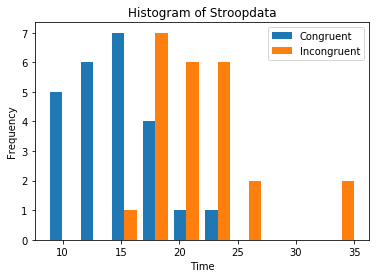

In [3]:
a = data['Congruent']
b = data['Incongruent']
legend = ['Congruent','Incongruent']
plt.hist([a,b])
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Histogram of Stroopdata')
plt.show()


From this plot, the average time taking of incongruent data is obviously greater than the congruent one. This corresponds with our hypothesis.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [5]:
#Sample Size
N = 24
c = b - a

# Calculate the Standard Deviation
# Calculate the variance to get the standard deviation
# For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_c = c.var(ddof=1)

#std deviation
s = np.sqrt(var_c)

print("s = " + str(s))

## Calculate the t-statistics
t = (b.mean() - a.mean())/(s/np.sqrt(N))

# compare with the critical t-value

# degrees of freedom
df = N - 1

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(p))

#Confidence Interval, t-critial value is 1.714 with df = 23 and p = 0.05

d = (b.mean() - a.mean())

print("CI = [" + str(d - 1.714*(s/np.sqrt(N))) +',' + str(d + 1.714*(s/np.sqrt(N))) +']')




s = 4.86482691036
t = 8.02070694411
p = 2.05150029187e-08
CI = [6.26274058666,9.66684274668]


Based on our results, a 8.020 t value is significantly greater than t-critical value 1.714. The null hypothesis is rejected which means people generally taking more time when doing incongruent texting. Correspondingly, 2.052e-08 p value is significantly less than the expected p value .05.

Confidence level is [6.26274058666,9.66684274668] which means people doing incongruent texting takes  6 to 9 seconds longer than congruent.
This results match up with our expectations.

(6) I think stroop effect is caused by selective attention. Some people are apt to catch color first while others are apt to catch text first. Text becomes a distraction if catching color first, and vice versa. Our brain needs more time to figure out the misleading or distraction. 

When I was a child, I played a game just like stroop effect: making a circle with my left hand while makeing a line with right hand. It definitely took more time for me to do this than making congruent action using both hands.